In [2]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("First 5 rows of train_df: \n", train_df.head(5))
print("First 5 rows of test_df: \n", test_df.head(5))

First 5 rows of train_df: 
    id  age          job  marital  education default  balance housing loan  \
0   0   42   technician  married  secondary      no        7      no   no   
1   1   38  blue-collar  married  secondary      no      514      no   no   
2   2   36  blue-collar  married  secondary      no      602     yes   no   
3   3   27      student   single  secondary      no       34     yes   no   
4   4   26   technician  married  secondary      no      889     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   25   aug       117         3     -1         0  unknown  0  
1   unknown   18   jun       185         1     -1         0  unknown  0  
2   unknown   14   may       111         2     -1         0  unknown  0  
3   unknown   28   may        10         2     -1         0  unknown  0  
4  cellular    3   feb       902         1     -1         0  unknown  1  
First 5 rows of test_df: 
        id  age            job  marital

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [5]:
train_df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
train_df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [10]:
test_id_placeholder = test_df['id']

In [12]:
train_df = train_df.drop(columns='id')
test_df = test_df.drop(columns='id')

In [13]:
train_df['contact'].value_counts()

contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64

In [ ]:
average_length_contact = train_df.groupby('contact')['duration'].mean()

average_length_contact

contact
cellular     265.710947
telephone    230.471057
unknown      239.834803
Name: duration, dtype: float64

How much predictive powert does the contact hold?

Cellular users tend to stay longer on calls than the telephone users.

Can I label the unknown with ML?

In [15]:
distribution_y = train_df['y'].value_counts().reset_index()

distribution_y

,y,count
0,0,659512
1,1,90488


In [22]:
distribution_y.columns

Index(['y', 'count'], dtype='object')

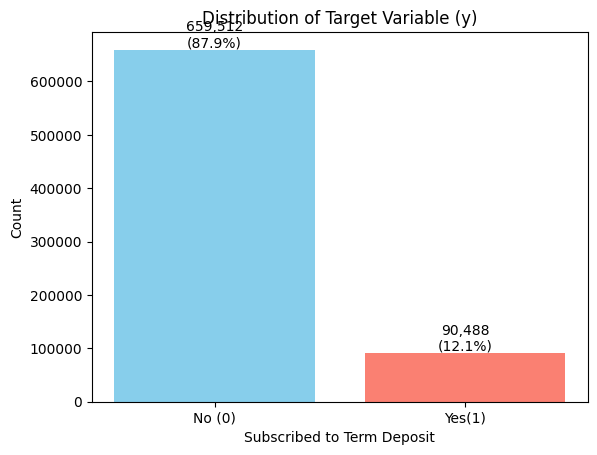

In [ ]:
plt.bar(distribution_y['y'], distribution_y['count'], color=['skyblue', 'skyblue'])
plt.xticks([0, 1], ['No (0)', 'Yes(1)'])
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.title("Distribution of Target Variable (y)")

total = distribution_y['count'].sum()
for i, val in enumerate(distribution_y['count']):
    plt.text(i, val + 5000, f"{val:,}\n({val/total:.1%})", ha='center')

plt.show()

In [28]:
average_balance = train_df.groupby('y')['balance'].mean().reset_index()

average_balance

,y,balance
0,0,1075.364679
1,1,2142.103240


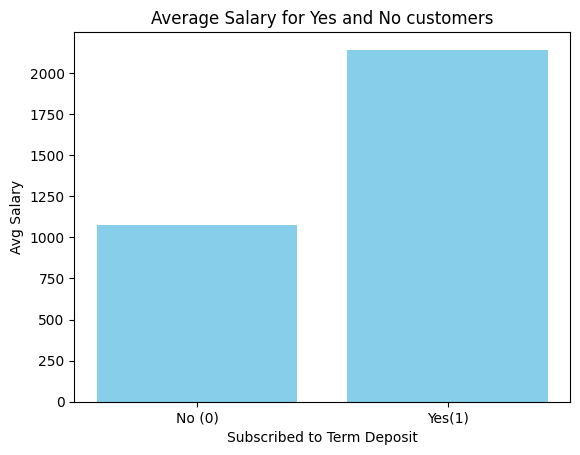

In [29]:
plt.bar(average_balance['y'], average_balance['balance'], color=['skyblue', 'skyblue'])
plt.xticks([0, 1], ['No (0)', 'Yes(1)'])
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Avg Salary")
plt.title("Average Salary for Yes and No customers")

plt.show()

<Axes: xlabel='y', ylabel='balance'>

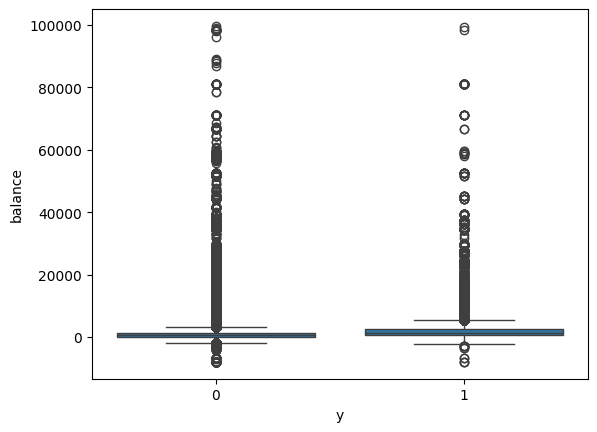

In [30]:
sns.boxplot( x=train_df["y"], y=train_df["balance"] )

the Balance feature could be a good predictor if the feature didn't present extreme outliers. Either outliers are dealt with or the model shouldn't rely heavily on this feature for prediction.

In [31]:
duration_average = train_df.groupby('y')['duration'].mean().reset_index()

duration_average

,y,duration
0,0,203.803576
1,1,638.327226


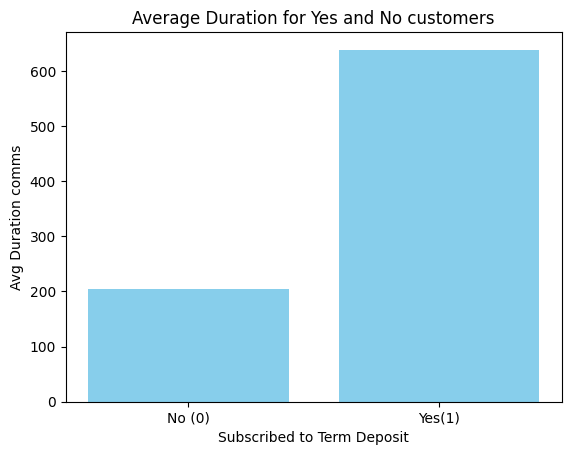

In [32]:
plt.bar(duration_average['y'], duration_average['duration'], color=['skyblue', 'skyblue'])
plt.xticks([0, 1], ['No (0)', 'Yes(1)'])
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Avg Duration comms")
plt.title("Average Duration for Yes and No customers")

plt.show()

<Axes: xlabel='y', ylabel='duration'>

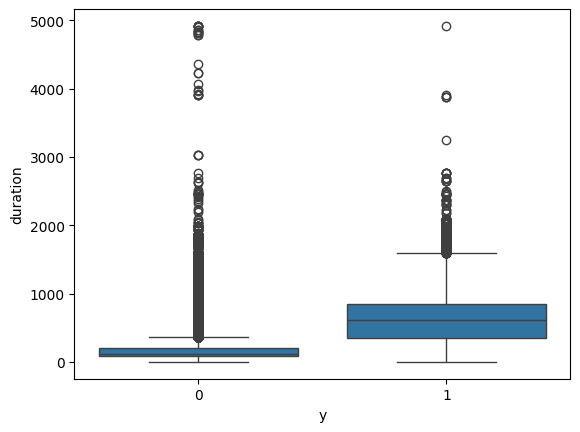

In [33]:
sns.boxplot( x=train_df["y"], y=train_df["duration"] )

In [27]:
positive_df = train_df.loc[train_df['y'] == 1]
positive_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
20,36,technician,single,tertiary,no,3415,no,no,cellular,24,jul,867,5,-1,0,unknown,1
42,59,admin.,married,secondary,no,2338,no,no,cellular,10,mar,472,1,90,3,success,1
57,46,admin.,married,secondary,no,1527,no,no,cellular,14,aug,391,1,-1,0,unknown,1
68,30,services,single,secondary,no,535,no,no,cellular,20,nov,944,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749922,33,student,single,unknown,no,358,no,no,cellular,8,jun,638,1,-1,0,unknown,1
749924,34,blue-collar,single,secondary,no,1979,no,no,unknown,16,jun,1205,3,-1,0,unknown,1
749973,33,management,married,tertiary,no,1831,no,no,cellular,12,aug,1452,5,-1,0,unknown,1
749976,44,technician,divorced,tertiary,no,2033,no,no,cellular,12,aug,309,1,104,2,success,1


In [35]:
negative_df = train_df.loc[train_df['y'] == 0]
negative_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749994,31,housemaid,single,secondary,no,594,no,no,cellular,4,feb,137,1,-1,0,unknown,0
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [34]:
positive_df['default'].value_counts()

default
no     89893
yes      595
Name: count, dtype: int64

In [36]:
negative_df['default'].value_counts()

default
no     647258
yes     12254
Name: count, dtype: int64

In [39]:
train_df['job'].value_counts(), train_df['marital'].value_counts(), train_df['education'].value_counts()

(job
 management       175541
 blue-collar      170498
 technician       138107
 admin.            81492
 services          64209
 retired           35185
 self-employed     19020
 entrepreneur      17718
 unemployed        17634
 housemaid         15912
 student           11767
 unknown            2917
 Name: count, dtype: int64,
 marital
 married     480759
 single      194834
 divorced     74407
 Name: count, dtype: int64,
 education
 secondary    401683
 tertiary     227508
 primary       99510
 unknown       21299
 Name: count, dtype: int64)

## Approach 1 EDA: target encoding

In [ ]:
train_df['job'] = train_df['job'].replace('unknown', 'other')
train_df['education'] = train_df['education'].replace('unknown', 'other')

test_df['job'] = test_df['job'].replace('unknown', 'other')
test_df['education'] = test_df['education'].replace('unknown', 'other')

In [41]:
train_df['job'].value_counts(), train_df['marital'].value_counts(), train_df['education'].value_counts()

(job
 management       172899
 blue-collar      164433
 technician       135370
 admin.            79550
 services          62591
 retired           33813
 self-employed     18667
 unemployed        17347
 entrepreneur      16939
 housemaid         15440
 student           10110
 Name: count, dtype: int64,
 marital
 married     465767
 single      188914
 divorced     72478
 Name: count, dtype: int64,
 education
 secondary    400969
 tertiary     227189
 primary       99001
 Name: count, dtype: int64)

### Target encoding

Dealing with the job feature which contains many labels

In [44]:
from sklearn.model_selection import KFold

n_splits = 5 #dividing the train data into 5 folds

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

train_df['job_te'] = 0 #new feature to store target encoding

for train_idx, val_idx in kf.split(train_df):
    train_fold = train_df.iloc[train_idx]
    val_fold = train_df.iloc[val_idx]

    means = train_fold.groupby('job')['y'].mean()

    train_df.iloc[val_idx, train_df.columns.get_loc('job_te')] = val_fold['job'].map(means).values

train_df['job_te'] = train_df['job_te'].fillna(train_df['y'].mean())

In [45]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_te
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0,0.118401
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0,0.066976
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0,0.067583
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0,0.347353
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1,0.118416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1,0.082384
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0,0.244649
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0,0.067205
749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0,0.118370


In [48]:
#encoding test_df without the y

job_means = train_df.groupby('job')['y'].mean()
global_means = train_df['y'].mean()

test_df['job_te'] = test_df['job'].map(job_means)

test_df['job_te'] = test_df['job_te'].fillna(global_means)

test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,job_te
0,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown,0.067389
1,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown,0.149712
2,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown,0.129266
3,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown,0.067389
4,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown,0.118512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown,0.149712
249996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure,0.082440
249997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success,0.245320
249998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown,0.067389
